Epoch 0: Loss = 0.19508646428585052
Epoch 100: Loss = 0.1166660487651825
Epoch 200: Loss = 0.11659696698188782
Epoch 300: Loss = 0.11652534455060959
Epoch 400: Loss = 0.11643052101135254
Epoch 500: Loss = 0.11626885086297989
Epoch 600: Loss = 0.11594513803720474
Epoch 700: Loss = 0.1152159720659256
Epoch 800: Loss = 0.11320426315069199
Epoch 900: Loss = 0.10601019114255905
Epoch 1000: Loss = 0.10140449553728104
Epoch 1100: Loss = 0.10087273269891739
Epoch 1200: Loss = 0.10003823041915894
Epoch 1300: Loss = 0.09871242195367813
Epoch 1400: Loss = 0.0966632142663002
Epoch 1500: Loss = 0.09363853186368942
Epoch 1600: Loss = 0.08944350481033325
Epoch 1700: Loss = 0.08417251706123352
Epoch 1800: Loss = 0.07769306004047394
Epoch 1900: Loss = 0.049235597252845764
Epoch 2000: Loss = 0.0068001518957316875
Epoch 2100: Loss = 0.003493204014375806
Epoch 2200: Loss = 0.003018760122358799
Epoch 2300: Loss = 0.002672474132850766
Epoch 2400: Loss = 0.0023751670960336924
Epoch 2500: Loss = 0.00210114498

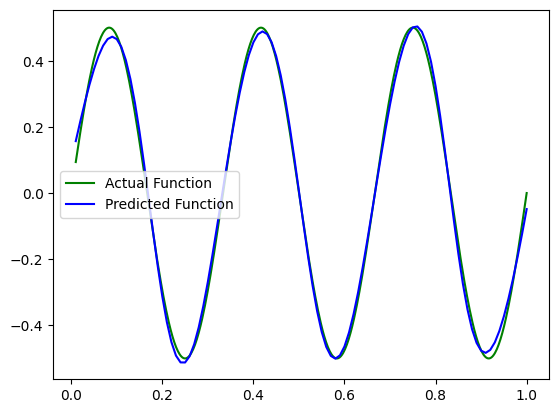

In [6]:
import matplotlib.pyplot as plt
import torch
import numpy as np


# Define the neural network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Set up the layers
        self.hidden1 = torch.nn.Linear(1, 12) # 1 neuron in input layer, 64 neurons in 1st hidden 
        self.output = torch.nn.Linear(12, 1) # 1 neuron in output layer

    def forward(self, x):
        # Define the forward pass
        x = torch.tanh(self.hidden1(x))
        x = self.output(x)
        return x


def f(x) -> torch.Tensor:
    return 0.5*torch.sin(6*np.pi*x)

x = torch.linspace(0.01, 1, 100)

net = Net()
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)  # Using Adam optimizer

train_loss_list = list()

for epoch in range(5000):
    optimizer.zero_grad()
    outputs = net(x.unsqueeze(1))
    loss = loss_func(outputs.squeeze(), f(x))
    loss.backward()
    optimizer.step()
    train_loss_list.append(loss.item())
    
    if epoch % 100 == 0:
        print("Epoch {}: Loss = {}".format(epoch, loss.detach().numpy()))

# Plot the actual function and predicted function
x_plot = torch.linspace(0.01, 1, 500)
actual_y = torch.tensor([f(p) for p in x_plot])
predicted_y = net(x.unsqueeze(1)).squeeze()
plt.plot(x_plot, actual_y, 'g', label='Actual Function')
plt.plot(x, predicted_y.detach().numpy(), 'b', label='Predicted Function')
plt.legend()
plt.show()

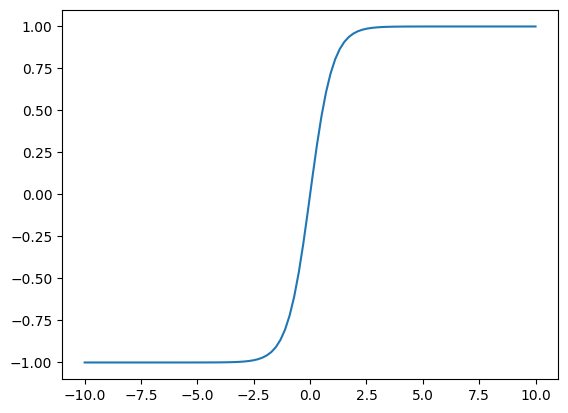

In [11]:
x = np.linspace(-10, 10, 100)
y = torch.tanh(torch.tensor(x))
plt.plot(x, y, label='ReLU')